In [28]:
#Pytorch Project 1
#Rice Type Classification (Binary classification)

In [2]:
!pip install opendatasets --quiet
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/mssmartypants/rice-type-classification'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vedantnadgir
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification


100%|██████████| 888k/888k [00:00<00:00, 641MB/s]

In [29]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
device = 'cuda' if torch.cuda.is_available() else 'cpu' #T4 GPU is cuda and pytorch has to identify it
print(device)

cuda


In [30]:
data_df = pd.read_csv('/content/rice-type-classification/riceClassification.csv')
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [31]:
#Data preprocessing
#Jasmine - 1, Gonen - 0.
data_df.dropna(inplace = True) #To drop mull/ missing values
data_df.drop(['id'],axis = 1,inplace = True) # axis =1 column, 0 row
print(data_df.shape)

(18185, 11)


In [32]:
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [33]:
 print(data_df['Class'].unique())
 print(data_df['Class'].value_counts())

[1 0]
Class
1    9985
0    8200
Name: count, dtype: int64


In [34]:
#We need to normalize the entire dataset
org_df = data_df.copy()
for col in data_df.columns:
  data_df[col] = data_df[col]/data_df[col].abs().max()
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [35]:
X = np.array(data_df.iloc[:, :-1])
Y = np.array(data_df.iloc[:, -1])

In [36]:
#Divide the dataset into training, validation and testing (70-15-15)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)

In [37]:
x_train,x_val,y_train,y_val = train_test_split(x_test,y_test,test_size = 0.5)

In [38]:
class dataset(Dataset):
  def __init__(self,X,Y):
    self.X = torch.tensor(X,dtype = torch.float32).to(device)
    self.Y = torch.tensor(Y,dtype = torch.float32).to(device)
  def __len__(self):
    return len(self.X)
  def __getitem__(self,idx):
    return self.X[idx],self.Y[idx]

In [39]:
training_data = dataset(x_train,y_train)
validation_data = dataset(x_val,y_val)
testing_data = dataset(x_test,y_test)

In [49]:
train_dataloader = DataLoader(training_data,batch_size = 21,shuffle=True)
test_dataloader = DataLoader(testing_data,batch_size = 21,shuffle=True)
val_dataloader = DataLoader(validation_data,batch_size = 21,shuffle=True)

In [50]:
#For Understanding
for x,y in train_dataloader:
  print(x)
  print("========")
  print(y)
  break

tensor([[0.6464, 0.8596, 0.6543, 0.9716, 0.6192, 0.8040, 0.5542, 0.7070, 0.7093,
         0.7454],
        [0.5874, 0.8345, 0.6150, 0.9757, 0.5633, 0.7664, 0.7827, 0.6718, 0.7137,
         0.7698],
        [0.6688, 0.8852, 0.6646, 0.9734, 0.6378, 0.8178, 0.6195, 0.7115, 0.7245,
         0.7557],
        [0.6318, 0.7421, 0.7467, 0.9220, 0.5990, 0.7949, 0.8917, 0.6381, 0.8511,
         0.5638],
        [0.5705, 0.8450, 0.5950, 0.9809, 0.5423, 0.7553, 0.5809, 0.6706, 0.6957,
         0.8057],
        [0.3345, 0.4885, 0.6095, 0.8554, 0.3210, 0.5783, 0.7753, 0.4579, 0.8749,
         0.4547],
        [0.6199, 0.8646, 0.6310, 0.9768, 0.5910, 0.7873, 0.8746, 0.6883, 0.7177,
         0.7774],
        [0.8973, 0.8824, 0.8780, 0.9246, 0.8447, 0.9472, 0.6710, 0.7499, 0.8750,
         0.5702],
        [0.6474, 0.8006, 0.7116, 0.9478, 0.6156, 0.8046, 0.6120, 0.6717, 0.7869,
         0.6384],
        [0.9383, 0.8926, 0.9105, 0.9187, 0.8876, 0.9687, 0.6782, 0.7668, 0.8751,
         0.5562],
        [0

In [59]:
HIDDEN_NEURONS = 10
class Mymodel(nn.Module):
  def __init__(self):
    super(Mymodel,self).__init__()
    self.input_layer = nn.Linear(x.shape[1], HIDDEN_NEURONS)
    self.linear = nn.Linear(HIDDEN_NEURONS,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self,x): #Designs the data forwarding and flow in our model
    x = self.input_layer(x)
    x = self.linear(x)
    x = self.sigmoid(x)
    return x
model = Mymodel().to(device)

In [60]:
summary(model, (X.shape[1], )) #Our model is Input → Linear (1st layer (10in -> 10 out)) → Linear (2nd layer (10in -> 1 out)) → Sigmoid
# Basically for Binary Classification because the output is 1 and is limited to [0,1] range

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [61]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(),lr = 1e-3)

In [62]:
# Lists to store metrics for plotting after training
total_loss_train_plot = []  # Average training loss per epoch
total_loss_val_plot = []    # Average validation loss per epoch
total_acc_train_plot = []   # Training accuracy per epoch (in %)
total_acc_val_plot = []     # Validation accuracy per epoch (in %)

# Number of times to loop over the entire dataset (epochs)
epochs = 10

# Loop through each epoch
for epoch in range(epochs):

  # Initialize total loss and accuracy counters for this epoch
  total_acc_train = 0
  total_loss_train = 0
  total_acc_val = 0
  total_loss_val = 0

  # === Training phase ===
  for data in train_dataloader:  # Loop through training data batch by batch
    input, label = data  # Get input features and true labels from the batch

    prediction = model(input).squeeze(1)  # Make predictions and remove extra dimension

    batch_loss = criterion(prediction, label)  # Compute loss for the current batch

    total_loss_train += batch_loss.item()  # Add current batch loss to total training loss

    acc = (prediction.round() == label).sum().item()  # Count correct predictions in the batch
    total_acc_train += acc  # Add to total training accuracy count

    batch_loss.backward()  # Backpropagation — compute gradients
    optimizer.step()       # Update model weights
    optimizer.zero_grad()  # Reset gradients for the next batch

  # === Validation phase (no training) ===
  with torch.no_grad():  # Disable gradient tracking (faster, saves memory)
    for data in val_dataloader:
      input, label = data
      prediction = model(input).squeeze(1)  # Make predictions

      batch_loss = criterion(prediction, label)  # Compute validation loss
      total_loss_val += batch_loss.item()  # Accumulate total validation loss

      acc = (prediction.round() == label).sum().item()  # Count correct predictions
      total_acc_val += acc  # Add to total validation accuracy count

  # === Record metrics after this epoch for plotting ===
  total_loss_train_plot.append(round(total_loss_train / training_data.__len__(), 4))  # Avg training loss
  total_loss_val_plot.append(round(total_loss_val / validation_data.__len__(), 4))    # Avg validation loss

  total_acc_train_plot.append(round(total_acc_train / training_data.__len__() * 100, 4))  # Train accuracy %
  total_acc_val_plot.append(round(total_acc_val / validation_data.__len__() * 100, 4))    # Val accuracy %

  # === Print results for this epoch ===
  print(f'''Epoch no. {epoch + 1}
  Train Loss: {round(total_loss_train / 1000, 4)}
  Train Accuracy: {round(total_acc_train / training_data.__len__() * 100, 4)}%
  Validation Loss: {round(total_loss_val / 1000, 4)}
  Validation Accuracy: {round(total_acc_val / validation_data.__len__() * 100, 4)}%''')
  print("=" * 25)


Epoch no. 1 
  Train Loss: 0.0837 
  Train Accuracy: 67.0455%
  Validation Loss: 0.0809 
  Validation Accuracy: 78.9589%
Epoch no. 2 
  Train Loss: 0.0765 
  Train Accuracy: 80.3886%
  Validation Loss: 0.0718 
  Validation Accuracy: 95.4179%
Epoch no. 3 
  Train Loss: 0.066 
  Train Accuracy: 94.3548%
  Validation Loss: 0.0596 
  Validation Accuracy: 96.0411%
Epoch no. 4 
  Train Loss: 0.0533 
  Train Accuracy: 97.1408%
  Validation Loss: 0.0465 
  Validation Accuracy: 98.3138%
Epoch no. 5 
  Train Loss: 0.0413 
  Train Accuracy: 97.8006%
  Validation Loss: 0.0357 
  Validation Accuracy: 97.8372%
Epoch no. 6 
  Train Loss: 0.0318 
  Train Accuracy: 98.1672%
  Validation Loss: 0.0277 
  Validation Accuracy: 98.0205%
Epoch no. 7 
  Train Loss: 0.025 
  Train Accuracy: 98.2038%
  Validation Loss: 0.022 
  Validation Accuracy: 98.2405%
Epoch no. 8 
  Train Loss: 0.0203 
  Train Accuracy: 98.4604%
  Validation Loss: 0.0182 
  Validation Accuracy: 98.5704%
Epoch no. 9 
  Train Loss: 0.0169 


In [63]:
#Now to the testing portion
with torch.no_grad():
  total_loss_test =0
  total_acc_test = 0
  for data in test_dataloader:
    input, label = data
    prediction = model(input).squeeze(1)
    batch_loss = criterion(prediction, label)
    total_loss_test += batch_loss.item()
    acc = (prediction.round() == label).sum().item()
    total_acc_test += acc

print(f'''Test Accuracy: {round(total_acc_test / testing_data.__len__() * 100, 4)}''')


Test Accuracy: 98.6437


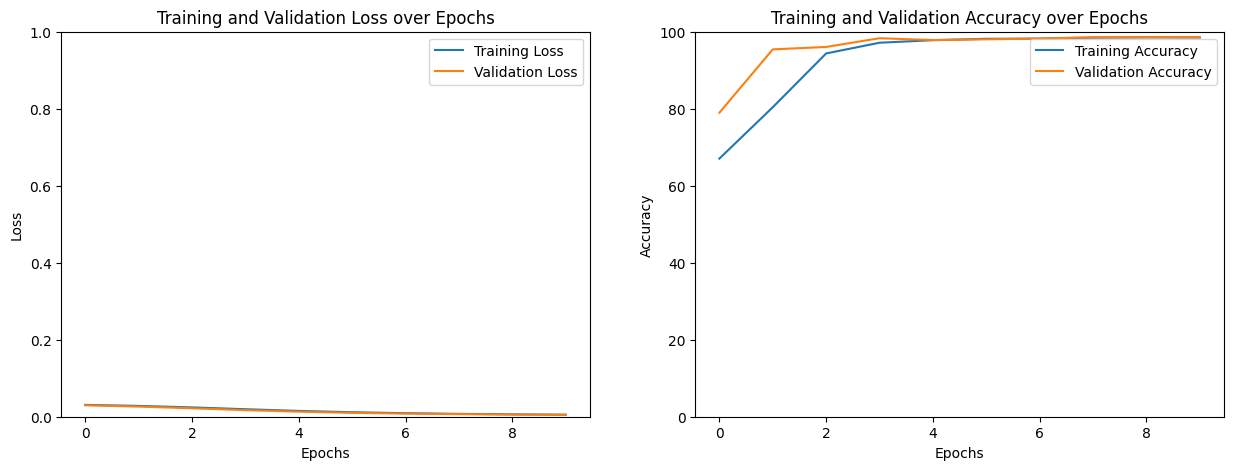

In [64]:
fig, axs = plt.subplots(nrows=1,ncols=2, figsize = (15,5))
axs[0].plot(total_loss_train_plot,label = 'Training Loss')
axs[0].plot(total_loss_val_plot,label = 'Validation Loss')
axs[0].set_title("Training and Validation Loss over Epochs")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].set_ylim([0,1])
axs[0].legend()

axs[1].plot(total_acc_train_plot,label = 'Training Accuracy')
axs[1].plot(total_acc_val_plot,label = 'Validation Accuracy')
axs[1].set_title("Training and Validation Accuracy over Epochs")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].set_ylim([0,100])
axs[1].legend()

plt.show()

In [66]:
area = 2353/org_df['Area'].abs().max()
MajorAxisLength = 81/org_df['MajorAxisLength'].abs().max()
MinorAxisLength = 42/org_df['MinorAxisLength'].abs().max()
Eccentricity = 32/org_df['Eccentricity'].abs().max()
ConvexArea = 12/org_df['ConvexArea'].abs().max()
EquivDiameter = 33/org_df['EquivDiameter'].abs().max()
Extent = 98/org_df['Extent'].abs().max()
Perimeter = 927/org_df['Perimeter'].abs().max()
Roundness = 677/org_df['Roundness'].abs().max()
AspectRation = 24/org_df['AspectRation'].abs().max()
mypred = model(torch.tensor([area,MajorAxisLength, MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation],dtype = torch.float32).to(device))

In [68]:
mypred.item() #The prediction from the model is 0 so Gonen rice type

0.0